In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Let's simulate some data (You can later replace this with your own CSV)
data = {
    'Age': [22, 30, 35, 40, 50, 60, 18, 27, 55, 45],
    'Salary': [25000, 60000, 70000, 50000, 80000, 95000, 20000, 48000, 85000, 72000],
    'Bought_Car': [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Bought, 0 = Didn't Buy
}

df = pd.DataFrame(data)
df.head()

,Age,Salary,Bought_Car
0,22,25000,0
1,30,60000,1
2,35,70000,1
3,40,50000,0
4,50,80000,1


In [3]:
# Split into features (X) and target (y)
X = df[['Age', 'Salary']]
y = df['Bought_Car']

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (7, 2)
Test Set Size: (3, 2)


In [4]:
# Create the model
rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=3,            # Limit depth to prevent overfitting
    criterion='gini',       # Split quality measure: 'gini' or 'entropy'
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Accuracy: 0.6666666666666666


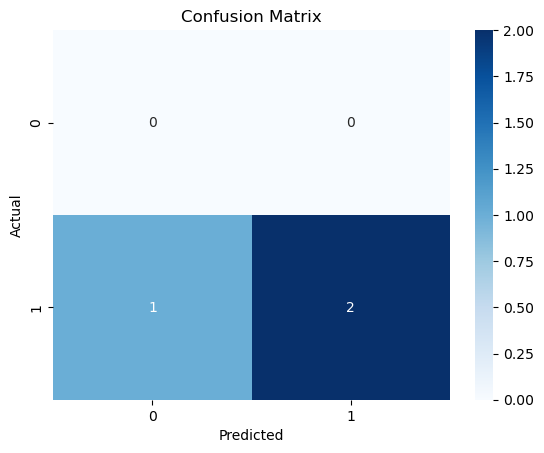

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# Predict on test data
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

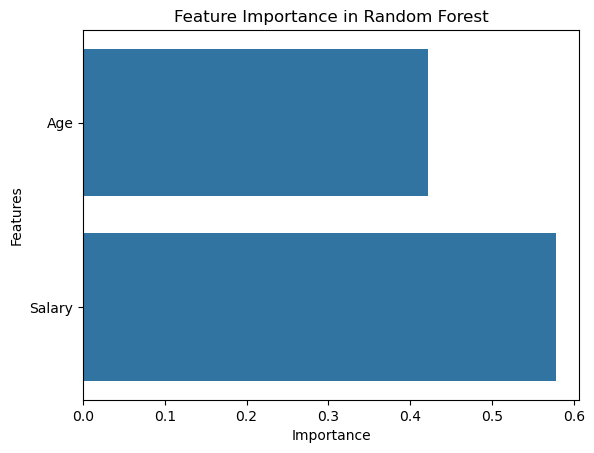

In [6]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Visualize importance
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

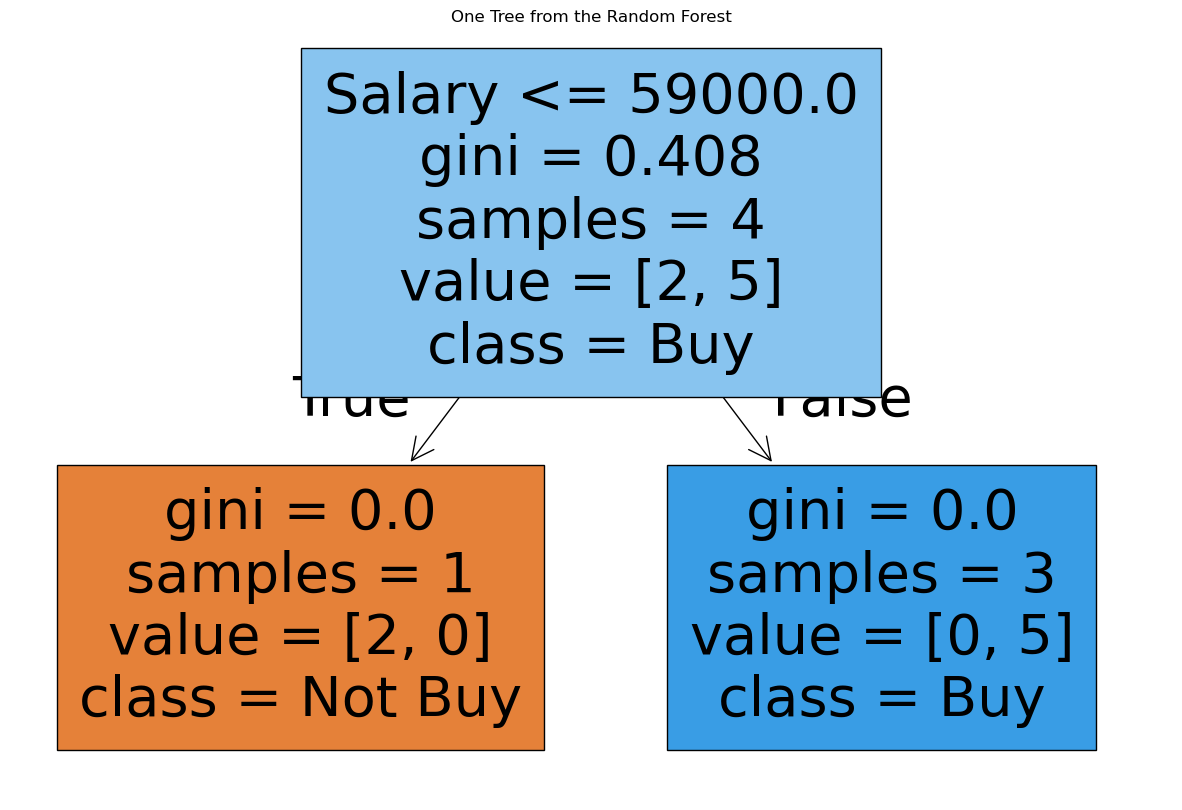

In [7]:
from sklearn import tree

# Visualize the first tree
plt.figure(figsize=(15,10))
tree.plot_tree(rf.estimators_[0],
               feature_names=X.columns,
               class_names=["Not Buy", "Buy"],
               filled=True)
plt.title("One Tree from the Random Forest")
plt.show()

In [8]:
# Let's test: A 33-year-old with 68k salary
sample = pd.DataFrame({'Age': [33], 'Salary': [68000]})
prediction = rf.predict(sample)
print("Prediction (1=Buy, 0=Not Buy):", prediction[0])

Prediction (1=Buy, 0=Not Buy): 1
